In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

models = [
    {"name": "Gemma_4b", "n_param": 4}, {"name": "Gemma_12b", "n_param": 12}, {"name": "Gemma_27b", "n_param": 27}, {"name": "Llama_17b", "n_param": 17}
]

naturalFile_I = "/Session1_NA.json"
JSONFile_I = "/Session1_JSA.json"

naturalFile_II = "/Session2_NA.json"
JSONFile_II = "/Session2_JSA.json"

naturalFile_III = "/Session3_NA.json"
JSONFile_III = "/Session3_JSA.json"

models.sort(key=lambda x: x['n_param'])
for model in models:
    model['path'] = f"DealingProblem/Sessions_{model['name']}"
print(models)

[{'name': 'Gemma_4b', 'n_param': 4, 'path': 'DealingProblem/Sessions_Gemma_4b'}, {'name': 'Gemma_12b', 'n_param': 12, 'path': 'DealingProblem/Sessions_Gemma_12b'}, {'name': 'Llama_17b', 'n_param': 17, 'path': 'DealingProblem/Sessions_Llama_17b'}, {'name': 'Gemma_27b', 'n_param': 27, 'path': 'DealingProblem/Sessions_Gemma_27b'}]


In [2]:
def compute_number_of_agreements_for_tones(JSON):
    agreements_per_tone = {'Neutral': 0, 'Aggressive': 0, 'Desperate': 0}
    total_per_tone = {'Neutral': 0, 'Aggressive': 0, 'Desperate': 0}

    for session in JSON['sessions']:
        evaluation = session['evaluation']
        if evalutation['results'] != 'DEAL':
            continue
        
        tone = dialogue['buyer_tone']
        total_per_tone[tone] += 1
        if dialogue['agreement_reached']:
            agreements_per_tone[tone] += 1

    agreement_rates = {}
    for tone in agreements_per_tone:
        if total_per_tone[tone] > 0:
            agreement_rates[tone] = agreements_per_tone[tone] / total_per_tone[tone]
        else:
            agreement_rates[tone] = 0.0

    return agreement_rates

In [ ]:
def result_counts(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        accepted_deals = 0
        refused_deals = 0
        no_agreements = 0
        for session in data['sessions']:
            evaluation = session['evaluation']
            if 'result' not in evaluation:
                continue
            if evaluation['result'] == 'DEAL':
                accepted_deals += 1
            elif evaluation['result'] == 'REFUSAL':
                refused_deals += 1
            else :
                no_agreements += 1
        return accepted_deals, refused_deals, no_agreements
    
for model in models:
    accepted, refused, no_agree = result_counts(model['path'] + naturalFile_I)
    model['natural_results_I'] = {
        'accepted': accepted,
        'refused': refused,
        'no_agreements': no_agree
    }
    accepted, refused, no_agree = result_counts(model['path'] + JSONFile_I)
    model['json_results_I'] = {
        'accepted': accepted,
        'refused': refused,
        'no_agreements': no_agree
    }
    accepted, refused, no_agree = result_counts(model['path'] + naturalFile_II)
    model['natural_results_II'] = {
        'accepted': accepted,
        'refused': refused,
        'no_agreements': no_agree
    }
    accepted, refused, no_agree = result_counts(model['path'] + JSONFile_II)
    model['json_results_II'] = {
        'accepted': accepted,
        'refused': refused,
        'no_agreements': no_agree
    }
    accepted, refused, no_agree = result_counts(model['path'] + naturalFile_III)
    model['natural_results_III'] = {
        'accepted': accepted,
        'refused': refused,
        'no_agreements': no_agree
    }
    accepted, refused, no_agree = result_counts(model['path'] + JSONFile_III)
    model['json_results_III'] = {
        'accepted': accepted,
        'refused': refused,
        'no_agreements': no_agree
    }
    

print(models)

[{'name': 'Gemma_4b', 'n_param': 4, 'path': 'DealingProblem/Sessions_Gemma_4b', 'natural_results_I': {'accepted': 10, 'refused': 16, 'no_agreements': 9}, 'json_results_I': {'accepted': 9, 'refused': 4, 'no_agreements': 18}, 'natural_results_II': {'accepted': 10, 'refused': 7, 'no_agreements': 11}, 'json_results_II': {'accepted': 11, 'refused': 4, 'no_agreements': 20}, 'natural_results_III': {'accepted': 4, 'refused': 19, 'no_agreements': 13}, 'json_results_III': {'accepted': 17, 'refused': 13, 'no_agreements': 6}}, {'name': 'Gemma_12b', 'n_param': 12, 'path': 'DealingProblem/Sessions_Gemma_12b', 'natural_results_I': {'accepted': 20, 'refused': 6, 'no_agreements': 10}, 'json_results_I': {'accepted': 16, 'refused': 18, 'no_agreements': 2}, 'natural_results_II': {'accepted': 27, 'refused': 8, 'no_agreements': 1}, 'json_results_II': {'accepted': 22, 'refused': 12, 'no_agreements': 2}, 'natural_results_III': {'accepted': 11, 'refused': 9, 'no_agreements': 16}, 'json_results_III': {'accepted

In [ ]:
def avg_rounds(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        total_rounds_accepted = 0
        total_rounds_refusal = 0
        total_rounds_no_agreements = 0
        for session in data['sessions']:
            evaluation = session['evaluation']
            if 'result' not in evaluation:
                continue
            if evaluation['result'] == 'DEAL':
                total_rounds_accepted += evaluation['rounds']
            elif evaluation['result'] == 'REFUSAL':
                total_rounds_refusal += evaluation['rounds']
            else :
                total_rounds_no_agreements += evaluation['rounds']
        return total_rounds_accepted, total_rounds_refusal, total_rounds_no_agreements
    
for model in models:
    total_accepted, total_refused, total_no_agree = avg_rounds(model['path'] + naturalFile_I)
    accepted = model['natural_results_I']['accepted']
    refused = model['natural_results_I']['refused']
    no_agree = model['natural_results_I']['no_agreements']
    total = 1
    model['natural_results_I']['avg_rounds'] = {
        'avg_rounds_accepted': round( total_accepted/total ,2) if accepted > 0 else 0,
        'avg_rounds_refused': round( total_refused/total, 2) if refused > 0 else 0,
        'avg_rounds_no_agreements': round( total_no_agree/total, 2) if no_agree > 0 else 0
    }
    total_accepted, total_refused, total_no_agree = avg_rounds(model['path'] + JSONFile_I)
    accepted = model['json_results_I']['accepted']
    refused = model['json_results_I']['refused']
    no_agree = model['json_results_I']['no_agreements']
    total = 1
    model['json_results_I']['avg_rounds'] = {
        'avg_rounds_accepted': round( total_accepted/total ,2) if accepted > 0 else 0,
        'avg_rounds_refused': round( total_refused/total, 2) if refused > 0 else 0,
        'avg_rounds_no_agreements': round( total_no_agree/total, 2) if no_agree > 0 else 0
    }


    total_accepted, total_refused, total_no_agree = avg_rounds(model['path'] + naturalFile_II)
    accepted = model['natural_results_II']['accepted']
    refused = model['natural_results_II']['refused']
    no_agree = model['natural_results_II']['no_agreements']
    model['natural_results_II']['avg_rounds'] = {
        'avg_rounds_accepted': round( total_accepted/total ,2) if accepted > 0 else 0,
        'avg_rounds_refused': round( total_refused/total, 2) if refused > 0 else 0,
        'avg_rounds_no_agreements': round( total_no_agree/total, 2) if no_agree > 0 else 0
    }
    total_accepted, total_refused, total_no_agree = avg_rounds(model['path'] + JSONFile_II)
    accepted = model['json_results_II']['accepted']
    refused = model['json_results_II']['refused']
    no_agree = model['json_results_II']['no_agreements']
    model['json_results_II']['avg_rounds'] = {
        'avg_rounds_accepted': round( total_accepted/total ,2) if accepted > 0 else 0,
        'avg_rounds_refused': round( total_refused/total, 2) if refused > 0 else 0,
        'avg_rounds_no_agreements': round( total_no_agree/total, 2) if no_agree > 0 else 0
    }
    
    total_accepted, total_refused, total_no_agree = avg_rounds(model['path'] + naturalFile_III)
    accepted = model['natural_results_III']['accepted']
    refused = model['natural_results_III']['refused']
    no_agree = model['natural_results_III']['no_agreements']
    model['natural_results_III']['avg_rounds'] = {
        'avg_rounds_accepted': round( total_accepted/total ,2) if accepted > 0 else 0,
        'avg_rounds_refused': round( total_refused/total, 2) if refused > 0 else 0,
        'avg_rounds_no_agreements': round( total_no_agree/total, 2) if no_agree > 0 else 0
    }
    total_accepted, total_refused, total_no_agree = avg_rounds(model['path'] + JSONFile_III)
    accepted = model['json_results_III']['accepted']
    refused = model['json_results_III']['refused']
    no_agree = model['json_results_III']['no_agreements']
    model['json_results_III']['avg_rounds'] = {
        'avg_rounds_accepted': round( total_accepted/total ,2) if accepted > 0 else 0,
        'avg_rounds_refused': round( total_refused/total, 2) if refused > 0 else 0,
        'avg_rounds_no_agreements': round( total_no_agree/total, 2) if no_agree > 0 else 0
    }
print(models)

[{'name': 'Gemma_4b', 'n_param': 4, 'path': 'DealingProblem/Sessions_Gemma_4b', 'natural_results_I': {'accepted': 10, 'refused': 16, 'no_agreements': 9, 'avg_rounds': {'avg_rounds_accepted': 62.0, 'avg_rounds_refused': 39.0, 'avg_rounds_no_agreements': 19.0}}, 'json_results_I': {'accepted': 9, 'refused': 4, 'no_agreements': 18, 'avg_rounds': {'avg_rounds_accepted': 62.0, 'avg_rounds_refused': 22.0, 'avg_rounds_no_agreements': 118.0}}, 'natural_results_II': {'accepted': 10, 'refused': 7, 'no_agreements': 11, 'avg_rounds': {'avg_rounds_accepted': 62.0, 'avg_rounds_refused': 20.0, 'avg_rounds_no_agreements': 43.0}}, 'json_results_II': {'accepted': 11, 'refused': 4, 'no_agreements': 20, 'avg_rounds': {'avg_rounds_accepted': 99.0, 'avg_rounds_refused': 31.0, 'avg_rounds_no_agreements': 85.0}}, 'natural_results_III': {'accepted': 4, 'refused': 19, 'no_agreements': 13, 'avg_rounds': {'avg_rounds_accepted': 19.0, 'avg_rounds_refused': 95.0, 'avg_rounds_no_agreements': 58.0}}, 'json_results_III

In [15]:
def compute_avg_rounds(jsonFile):
    with open(jsonFile, 'r') as f:
        data = json.load(f)
        total_rounds = 0
        session_count = 0
        for session in data['sessions']:
            evaluation = session['evaluation']
            if 'result' not in evaluation:
                continue
            total_rounds += evaluation['rounds']
            session_count += 1
        return round(total_rounds / session_count, 2) if session_count > 0 else 0
    
for model in models:
    model['natural_results_I']['avg_rounds_overall'] = compute_avg_rounds(model['path'] + naturalFile_I)
    model['json_results_I']['avg_rounds_overall'] = compute_avg_rounds(model['path'] + JSONFile_I)
    model['natural_results_II']['avg_rounds_overall'] = compute_avg_rounds(model['path'] + naturalFile_II)
    model['json_results_II']['avg_rounds_overall'] = compute_avg_rounds(model['path'] + JSONFile_II)
    model['natural_results_III']['avg_rounds_overall'] = compute_avg_rounds(model['path'] + naturalFile_III)
    model['json_results_III']['avg_rounds_overall'] = compute_avg_rounds(model['path'] + JSONFile_III)

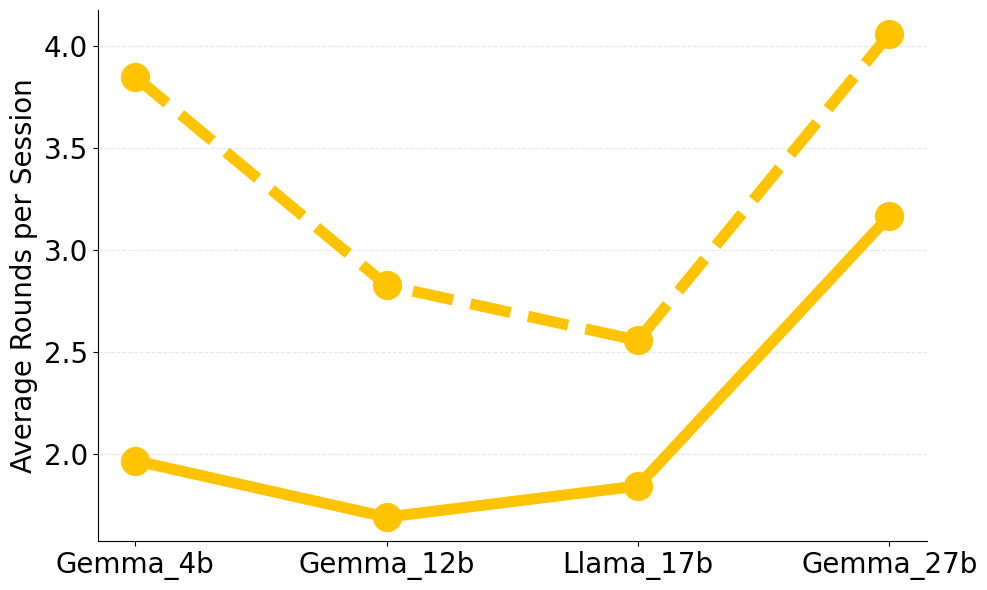

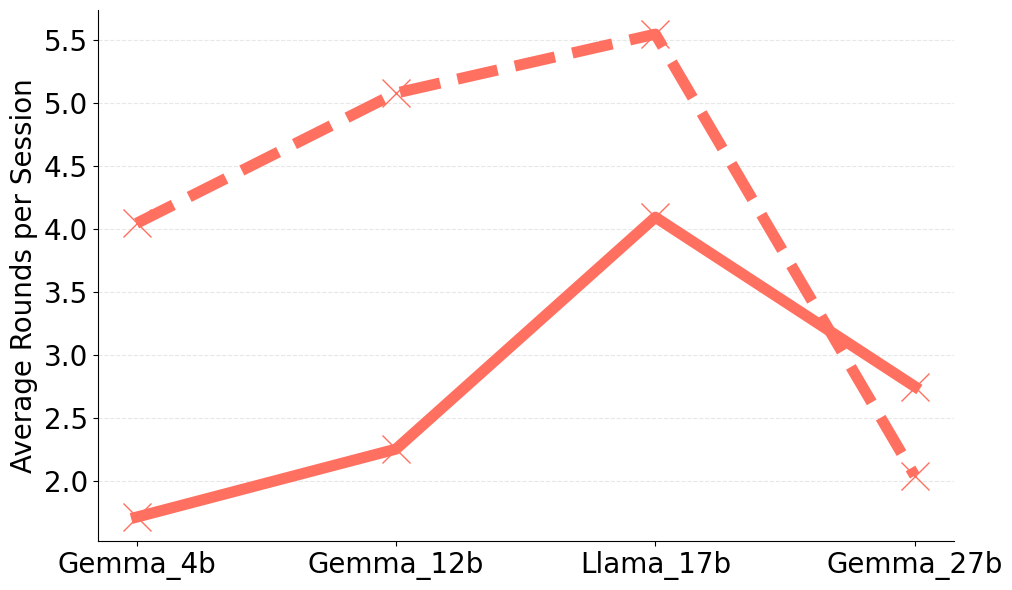

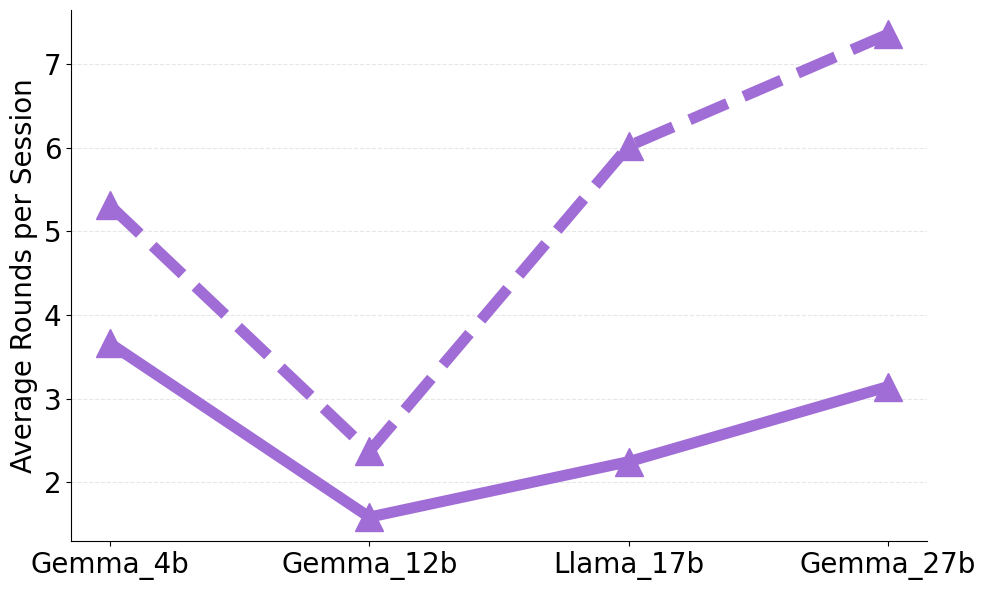

In [16]:
def plot_polyline_avg_rounds(models, version='I'):
    labels = [f"{m['name']}" for m in models]
    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(10, 6))

    total = 36*10*2

    nat_acc = np.array([
        m[f'natural_results_{version}']['avg_rounds']['avg_rounds_accepted']*m[f'natural_results_{version}']['accepted']/total for m in models])
    nat_ref = np.array([m[f'natural_results_{version}']['avg_rounds']['avg_rounds_refused']*m[f'natural_results_{version}']['refused']/total for m in models])
    nat_no  = np.array([m[f'natural_results_{version}']['avg_rounds']['avg_rounds_no_agreements']*m[f'natural_results_{version}']['no_agreements']/total for m in models])

    nat_I_avg_rounds = [nat_acc[i] + nat_ref[i] + nat_no[i] for i in range(len(nat_acc))]

    js_acc = np.array([m[f'json_results_{version}']['avg_rounds']['avg_rounds_accepted']*m[f'json_results_{version}']['accepted']/total for m in models])
    js_ref = np.array([m[f'json_results_{version}']['avg_rounds']['avg_rounds_refused']*m[f'json_results_{version}']['refused']/total for m in models])
    js_no  = np.array([m[f'json_results_{version}']['avg_rounds']['avg_rounds_no_agreements']*m[f'json_results_{version}']['no_agreements']/total for m in models])

    js_I_avg_rounds = [js_acc[i] + js_ref[i] + js_no[i] for i in range(len(js_acc))]
    if version == 'I':
        marker = 'o'
        color = '#FFC300'
    elif version == 'II':
        marker = 'x'
        color = '#FF7060'
    elif version == 'III':
        marker = '^'
        color = '#A06CD5'
    else:
        marker = 'o'
        color = '#000000'
    ax.plot(x, nat_I_avg_rounds, marker=marker, markersize=20, linewidth=8, label='Natural Language Bench I', color=color)
    ax.plot(x, js_I_avg_rounds, marker=marker, linestyle='--', markersize=20, linewidth=8, label='JSON Format Bench I', color=color)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel(f'Average Rounds per Session', fontsize=20)
    #ax.legend()
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()

plot_polyline_avg_rounds(models, version='I')
plot_polyline_avg_rounds(models, version='II')
plot_polyline_avg_rounds(models, version='III')

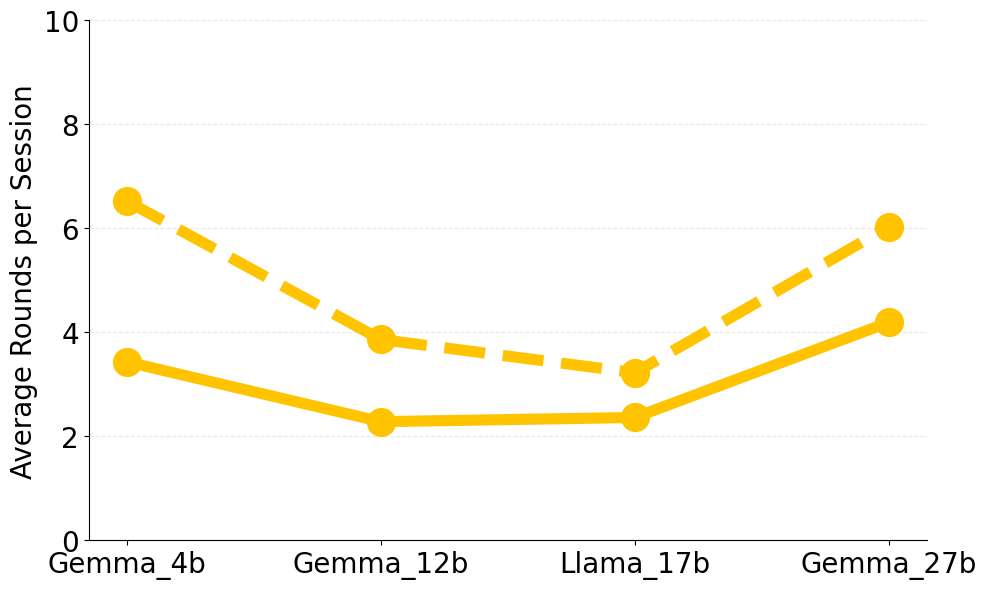

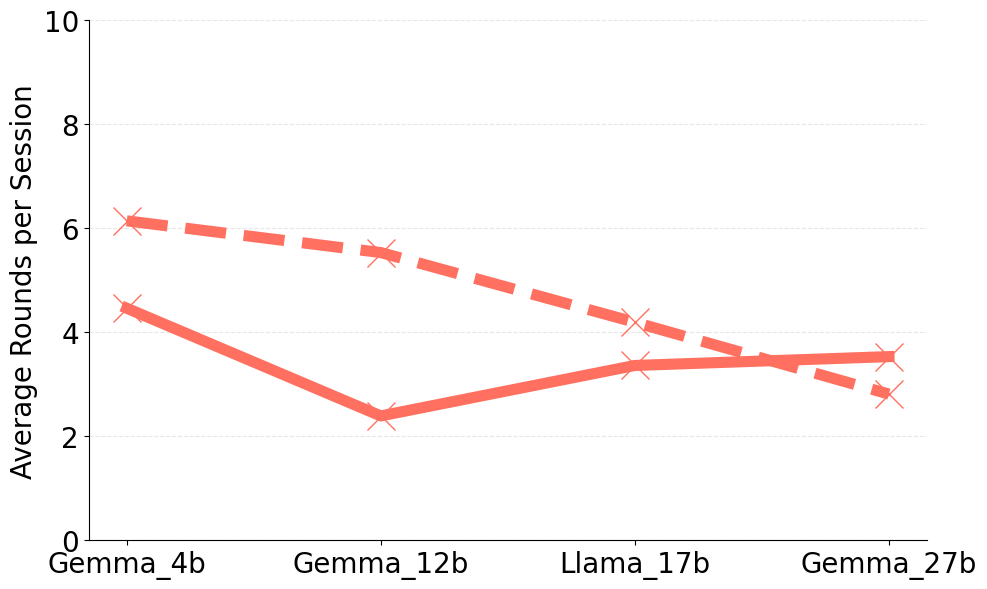

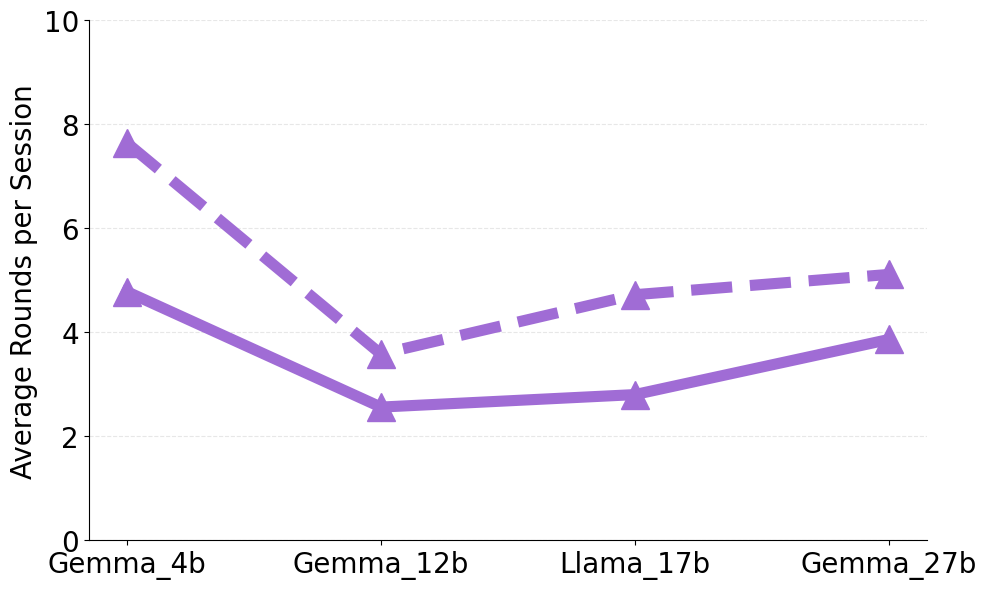

In [ ]:
def plot_polyline_avg_rounds(models, version='I'):
    labels = [f"{m['name']}" for m in models]
    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(10, 6))
    nat_avg_rounds = [m[f'natural_results_{version}']['avg_rounds_overall'] for m in models]

    js_avg_rounds = [m[f'json_results_{version}']['avg_rounds_overall'] for m in models]
    if version == 'I':
        marker = 'o'
        color = '#FFC300'
    elif version == 'II':
        marker = 'x'
        color = '#FF7060'
    elif version == 'III':
        marker = '^'
        color = '#A06CD5'
    else:
        marker = 'o'
        color = '#000000'
    ax.plot(x, nat_avg_rounds, marker=marker, markersize=20, linewidth=8, label='Natural Language Bench I', color=color)
    ax.plot(x, js_avg_rounds, marker=marker, linestyle='--', markersize=20, linewidth=8, label='JSON Format Bench I', color=color)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel(f'Average Rounds per Session', fontsize=20)
    #ax.legend()
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0, 10)
    plt.tight_layout()

plot_polyline_avg_rounds(models, version='I')
plot_polyline_avg_rounds(models, version='II')
plot_polyline_avg_rounds(models, version='III')

In [22]:
import math

def compute_avg_utility(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        total_utility_buyer = 0
        total_utility_seller = 0
        count = 0
        for session in data['sessions']:
            evaluation = session['evaluation']
            if 'result' not in evaluation:
                continue
            if evaluation['result'] == 'DEAL':
                    if not math.isnan(evaluation['analysis'][0]['utility']) and not math.isnan(evaluation['analysis'][1]['utility']):
                        if evaluation['analysis'][0]['utility'] > 0 and evaluation['analysis'][1]['utility'] > 0:
                            total_utility_buyer += evaluation['analysis'][0]['utility']
                            total_utility_seller += evaluation['analysis'][1]['utility']
                            count += 1    

        return {"buyer_avg_utility": total_utility_buyer / count if count > 0 else 0,
                "seller_avg_utility": total_utility_seller / count if count > 0 else 0}
    
for model in models:
    nat_util = compute_avg_utility(model['path'] + naturalFile_I)
    model.setdefault( 'natural_results_I', {})['avg_utility'] = nat_util
    json_util = compute_avg_utility(model['path'] + JSONFile_I)
    model.setdefault( 'json_results_I', {})['avg_utility'] = json_util

    nat_util = compute_avg_utility(model['path'] + naturalFile_II)
    model.setdefault( 'natural_results_II', {})['avg_utility'] = nat_util
    json_util = compute_avg_utility(model['path'] + JSONFile_II)
    model.setdefault( 'json_results_II', {})['avg_utility'] = json_util
    
    nat_util = compute_avg_utility(model['path'] + naturalFile_III)
    model.setdefault( 'natural_results_III', {})['avg_utility'] = nat_util
    json_util = compute_avg_utility(model['path'] + JSONFile_III)
    model.setdefault( 'json_results_III', {})['avg_utility'] = json_util

print(json.dumps(models, indent=4))

[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            }
        },
        "json_results_I": {
            "accepted": 9,
            "refused": 4,
            "no_agreements": 18,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 22.0,
                "avg_rounds_no_agreements": 118.0
            },
            "avg_rounds_overall": 6.52,
            "avg_utility": {
                "

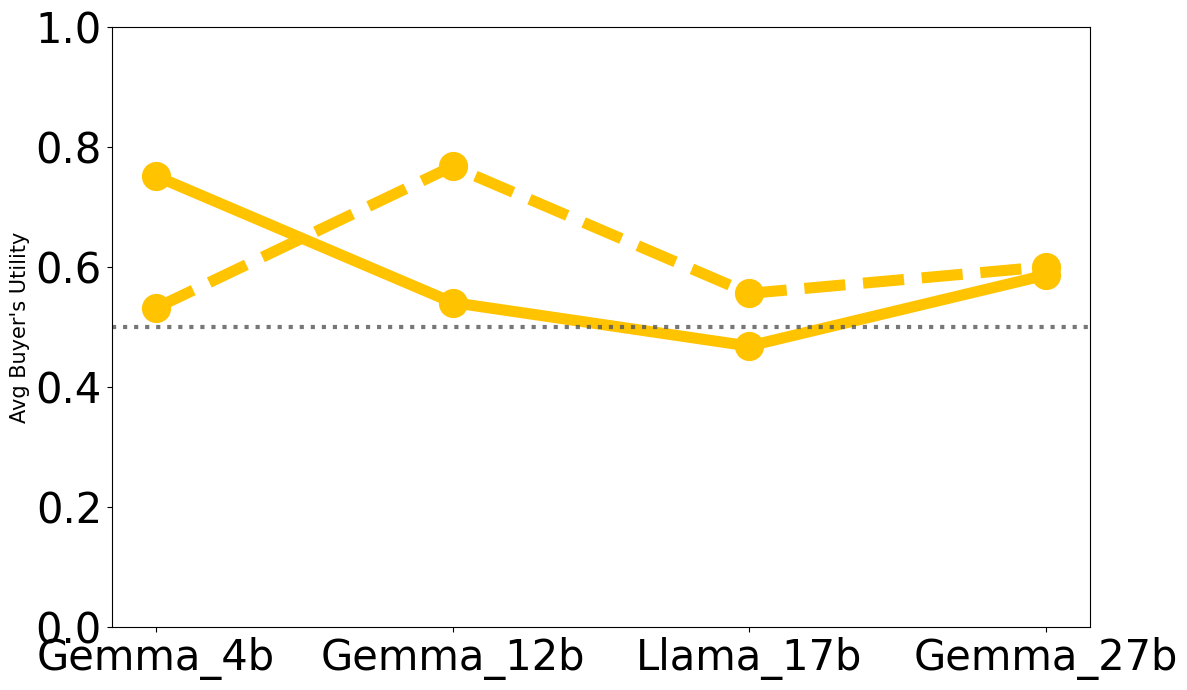

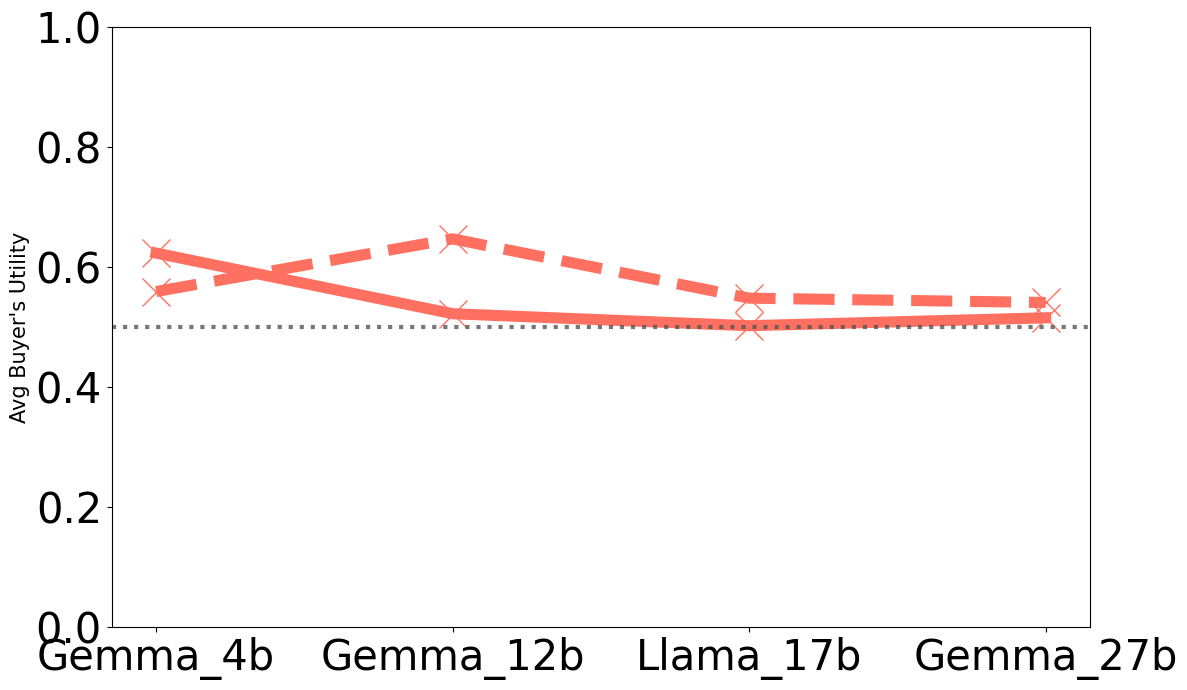

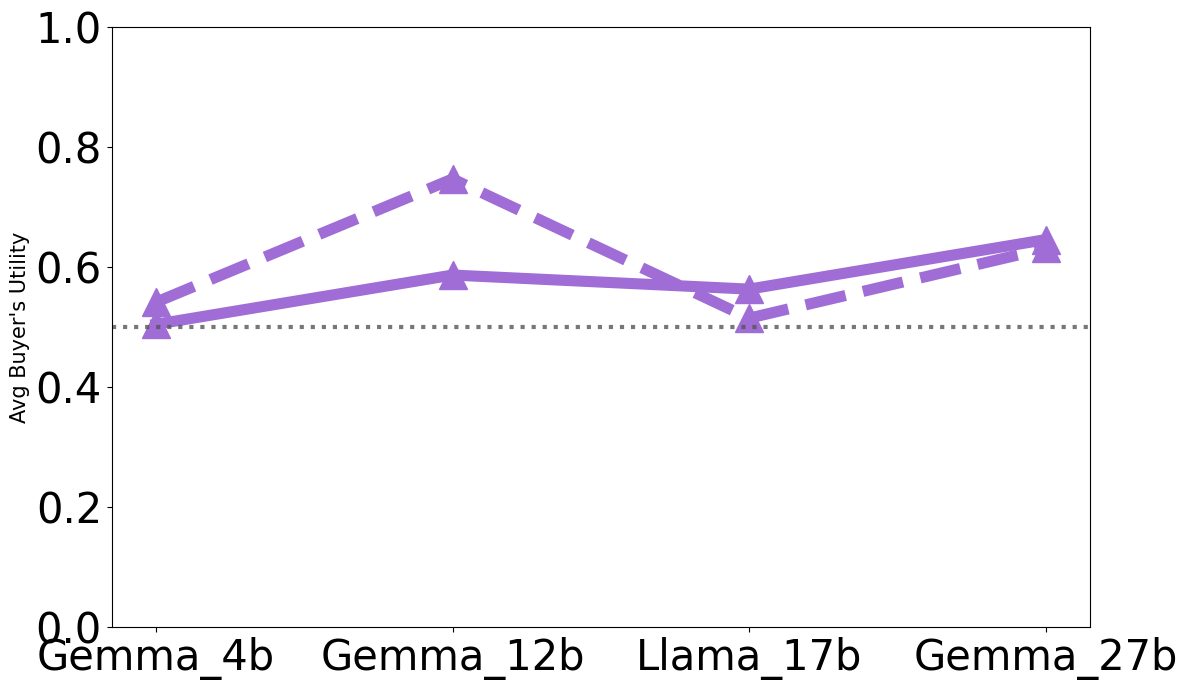

In [ ]:
def plot_utility_polyline(models, version='I'):
    labels = [f"{m['name']}" for m in models]
    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(12, 7))

    nat_utilities = [
        (m[f'natural_results_{version}']['avg_utility']['buyer_avg_utility'])
        for m in models
    ]
    js_utilities = [
        (m[f'json_results_{version}']['avg_utility']['buyer_avg_utility'])
        for m in models
    ]

    if version == 'I':
        marker = 'o'
        color = '#FFC300'
    elif version == 'II':
        marker = 'x'
        color = '#FF7060'
    elif version == 'III':
        marker = '^'
        color = '#A06CD5'
    else:
        marker = 'o'
        color = '#000000'
        

    ax.plot(x, nat_utilities, marker=marker, markersize=20, linewidth=8, label=f'Avg Utility (Natural Bench_{version})', color=color)
    ax.plot(x, js_utilities, marker=marker, markersize=20, linestyle='--', linewidth=8, label=f'Avg Utility (JSON Bench_{version})', color=color)

    # Pulizia estetica
    ax.set_ylabel('Average Buyer\'s Utility', fontsize=25)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=30)
    ax.set_ylabel(f'Avg Buyer\'s Utility', fontsize=15)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_ylim(0, 1)

    
    ax.axhline(0.5, 
           color='#555555',    
           linestyle='dotted',      
           linewidth=3,      
           alpha=0.8,        
           zorder=2)           

    plt.tight_layout()
    plt.show()

plot_utility_polyline(models, version='I')
plot_utility_polyline(models, version='II')
plot_utility_polyline(models, version='III')

In [28]:
def compute_tones_avg_utility(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        total_neutral_utility = 0
        total_aggressive_utility = 0
        total_desperate_utility = 0
        count_neutral = 0
        count_aggressive = 0
        count_desperate = 0
        for session in data['sessions']:
            for i in range(len(session['agents'])):
                if session['evaluation'] == {}:
                    continue
                if session['evaluation']['result'] != 'DEAL' or math.isnan(session['evaluation']['analysis'][i]['utility']) or session['evaluation']['analysis'][i]['utility'] < 0 or session['evaluation']['analysis'][i]['utility'] > 1:
                    continue
                if 'neutral' in session['agents'][i]['name']:
                        total_neutral_utility += session['evaluation']['analysis'][i]['utility']
                        count_neutral += 1
                elif 'aggressive' in session['agents'][i]['name']:
                        total_aggressive_utility += session['evaluation']['analysis'][i]['utility']
                        count_aggressive += 1
                elif 'desperate' in session['agents'][i]['name']:
                        total_desperate_utility += session['evaluation']['analysis'][i]['utility']
                        count_desperate += 1
        return {
            "neutral_avg_utility": total_neutral_utility / count_neutral if count_neutral > 0 else 0,
            "aggressive_avg_utility": total_aggressive_utility / count_aggressive if count_aggressive > 0 else 0,
            "desperate_avg_utility": total_desperate_utility / count_desperate if count_desperate > 0 else 0
        }

for model in models:
    nat_util = compute_tones_avg_utility(model['path'] + naturalFile_I)
    model['natural_results_I']['avg_tones_utility'] = nat_util
    json_util = compute_tones_avg_utility(model['path'] + JSONFile_I)
    model['json_results_I']['avg_tones_utility'] = json_util
    nat_util = compute_tones_avg_utility(model['path'] + naturalFile_II)
    model['natural_results_II']['avg_tones_utility'] = nat_util
    json_util = compute_tones_avg_utility(model['path'] + JSONFile_II)
    model['json_results_II']['avg_tones_utility'] = json_util
    nat_util = compute_tones_avg_utility(model['path'] + naturalFile_III)
    model['natural_results_III']['avg_tones_utility'] = nat_util
    json_util = compute_tones_avg_utility(model['path'] + JSONFile_III)
    model['json_results_III']['avg_tones_utility'] = json_util

print(json.dumps(models, indent=4))

[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            },
            "avg_tones_utility": {
                "neutral_avg_utility": 0.32734375685675066,
                "aggressive_avg_utility": 0.6741771368584096,
                "desperate_avg_utility": 0.8222591362126246
            }
        },
        "json_results_I": {
            "accepted": 9,
            "refused": 4,
            "no_agreements": 18,
            "avg_rounds": {
        

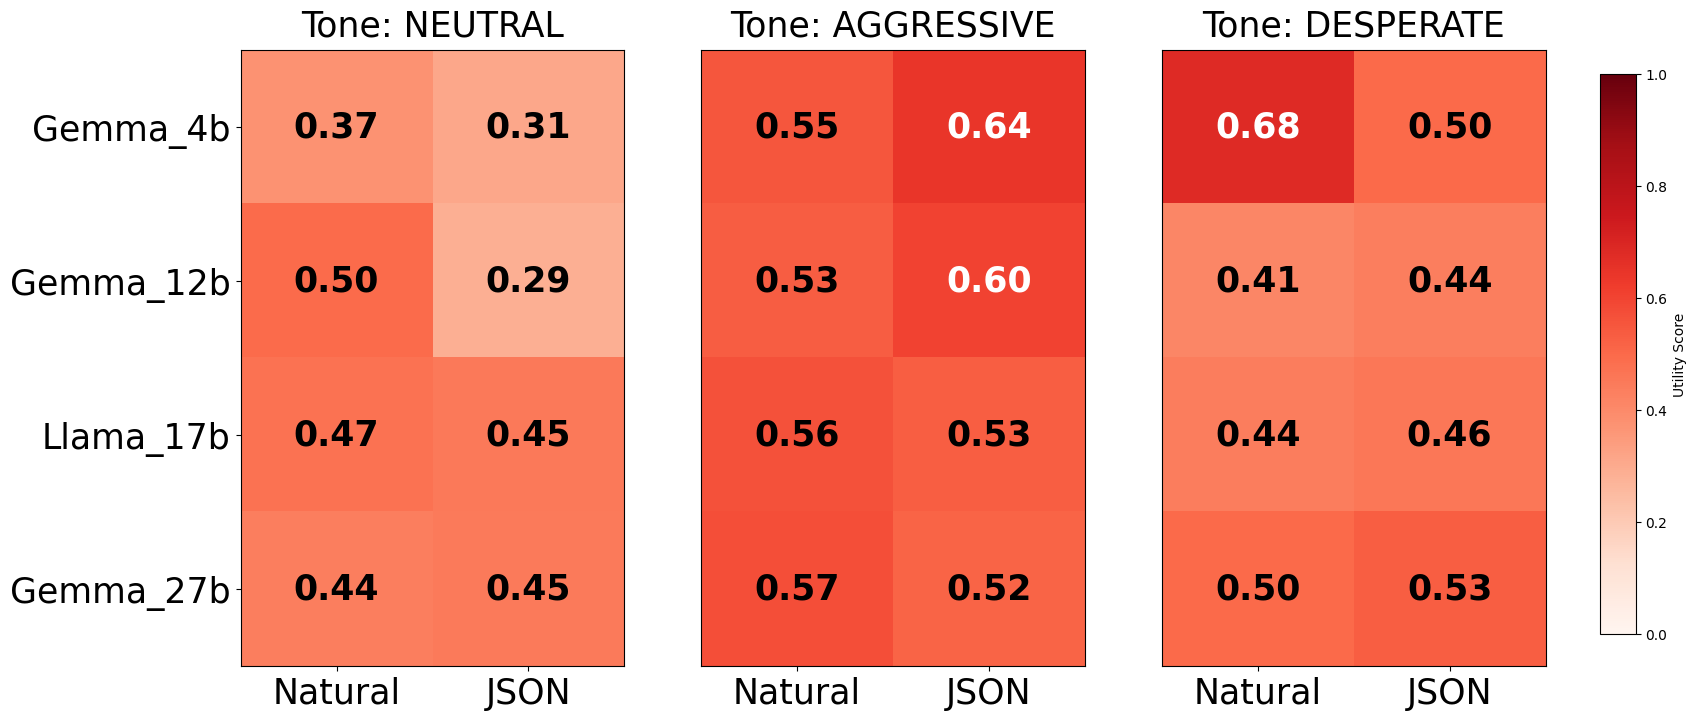

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tones_comparison(models):
    labels = [f"{m['name']}" for m in models]
    tones = ['neutral', 'aggressive', 'desperate']
    
    def get_tone_matrix(tone_name):
        nat_col = [(m['natural_results_I']['avg_tones_utility'][f'{tone_name}_avg_utility'] + 
                    m['natural_results_II']['avg_tones_utility'][f'{tone_name}_avg_utility'] + 
                    m['natural_results_III']['avg_tones_utility'][f'{tone_name}_avg_utility']) / 3 for m in models]
        
        js_col = [(m['json_results_I']['avg_tones_utility'][f'{tone_name}_avg_utility'] + 
                   m['json_results_II']['avg_tones_utility'][f'{tone_name}_avg_utility'] + 
                   m['json_results_III']['avg_tones_utility'][f'{tone_name}_avg_utility']) / 3 for m in models]
        
        return np.column_stack((nat_col, js_col))

    fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
    formats = ['Natural', 'JSON']

    for i, tone in enumerate(tones):
        data = get_tone_matrix(tone)
        ax = axes[i]
        
        im = ax.imshow(data, cmap="Reds", aspect='auto', vmin=0, vmax=1)
        
        # Etichette
        ax.set_xticks([0, 1])
        ax.set_xticklabels(formats, fontsize=25)
        if i == 0:
            ax.set_yticks(np.arange(len(labels)))
            ax.set_yticklabels(labels, fontsize=25)
        else:
            ax.tick_params(left=False) 

        for row in range(len(labels)):
            for col in range(2):
                val = data[row, col]
                color = "white" if val > 0.6 else "black"
                ax.text(col, row, f"{val:.2f}", ha="center", va="center", color=color, fontweight='bold', fontsize=25)

        ax.set_title(f'Tone: {tone.upper()}', fontsize=25, pad=10)

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax, label='Utility Score')

    plt.show()
plot_tones_comparison(models)

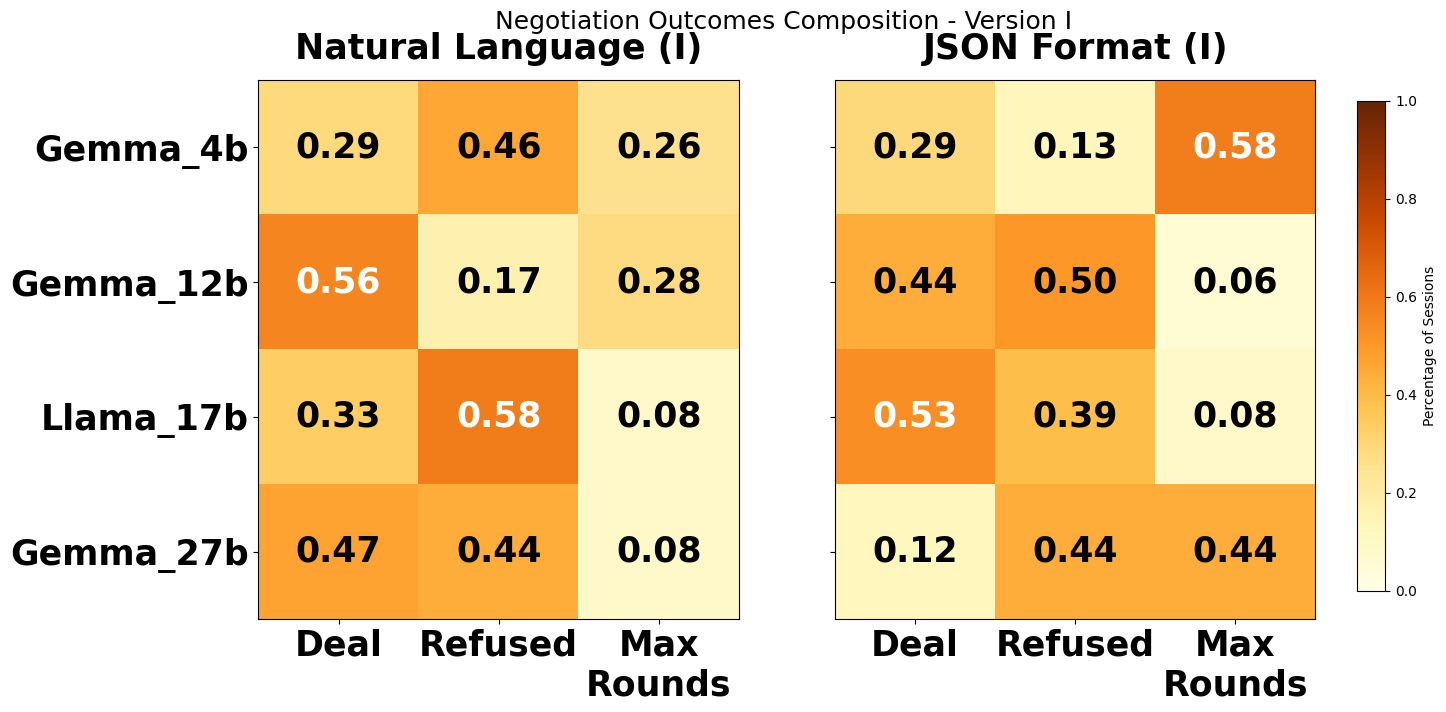

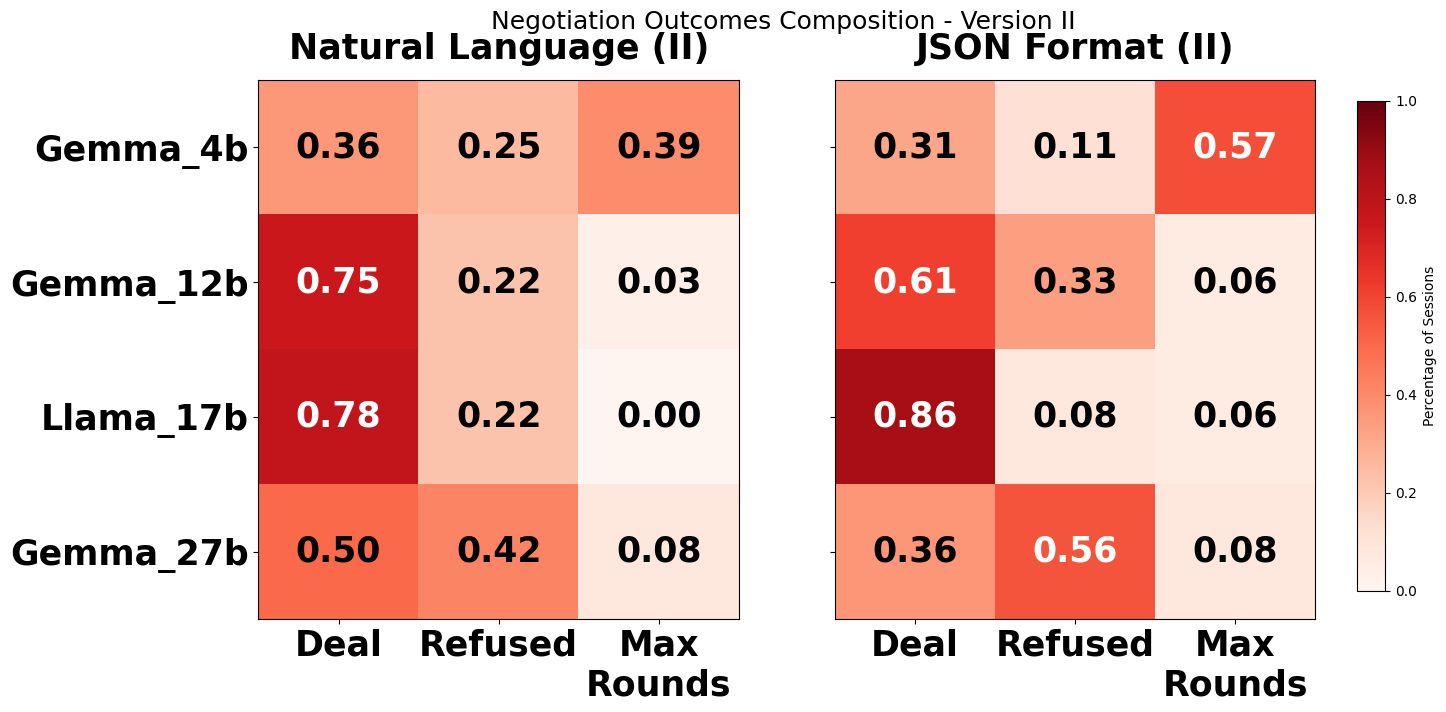

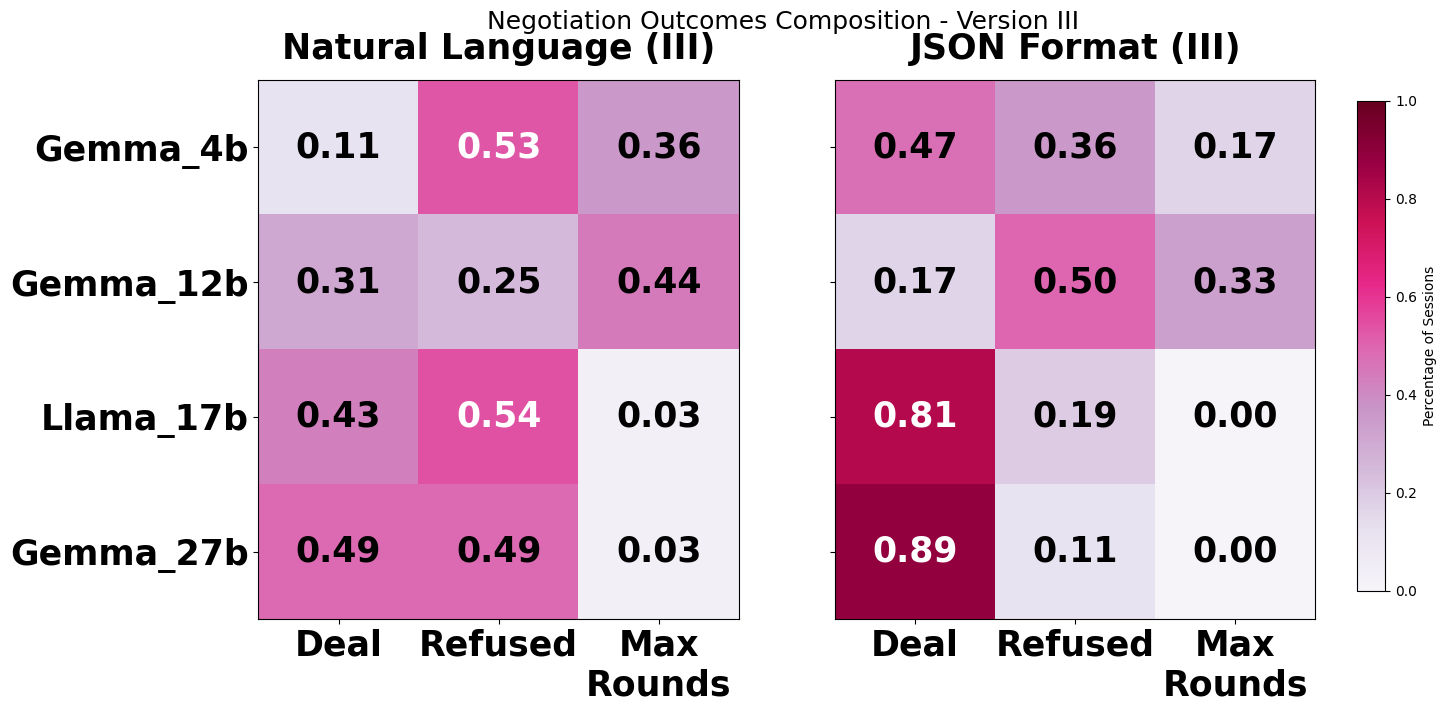

In [33]:
def plot_heatmap_round_composition(models, version='I'):
    labels = [f"{m['name']}" for m in models]
    categories = ['Deal', 'Refused', 'Max\nRounds']

    def get_normalized_data(prefix):
        acc = np.array([m[f'{prefix}_results_{version}']['accepted'] for m in models])
        ref = np.array([m[f'{prefix}_results_{version}']['refused'] for m in models])
        no_agr = np.array([m[f'{prefix}_results_{version}']['no_agreements'] for m in models])
        
        totals = acc + ref + no_agr

        return np.column_stack((acc/totals, ref/totals, no_agr/totals))

    data_nat = get_normalized_data('natural')
    data_js = get_normalized_data('json')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
    
    def draw_manual_heatmap(ax, data, title):

        if version == 'I':
            cmap = "YlOrBr"
        elif version == 'II':
            cmap = "Reds"
        elif version == 'III':
            cmap = "PuRd"
        else:
            cmap = "YlOrBr"

        im = ax.imshow(data, cmap=cmap, aspect='auto', vmin=0, vmax=1)
        
        ax.set_xticks(np.arange(len(categories)))
        ax.set_xticklabels(categories, fontsize=25, fontweight='bold')
        ax.set_yticks(np.arange(len(labels)))
        ax.set_yticklabels(labels, fontsize=25, fontweight='bold')
        
        for i in range(len(labels)):
            for j in range(len(categories)):
                val = data[i, j]
                color = "white" if val > 0.5 else "black"
                ax.text(j, i, f"{val:.2f}", ha="center", va="center", 
                        color=color, fontweight='bold', fontsize=25)

        ax.set_title(title, fontsize=25, pad=15, fontweight='bold')
        return im

    im1 = draw_manual_heatmap(ax1, data_nat, f'Natural Language ({version})')
    im2 = draw_manual_heatmap(ax2, data_js, f'JSON Format ({version})')

    fig.subplots_adjust(right=0.88)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
    fig.colorbar(im1, cax=cbar_ax, label='Percentage of Sessions')

    plt.suptitle(f'Negotiation Outcomes Composition - Version {version}', fontsize=18, y=0.98)
    plt.show()

plot_heatmap_round_composition(models, version='I')
plot_heatmap_round_composition(models, version='II')
plot_heatmap_round_composition(models, version='III')

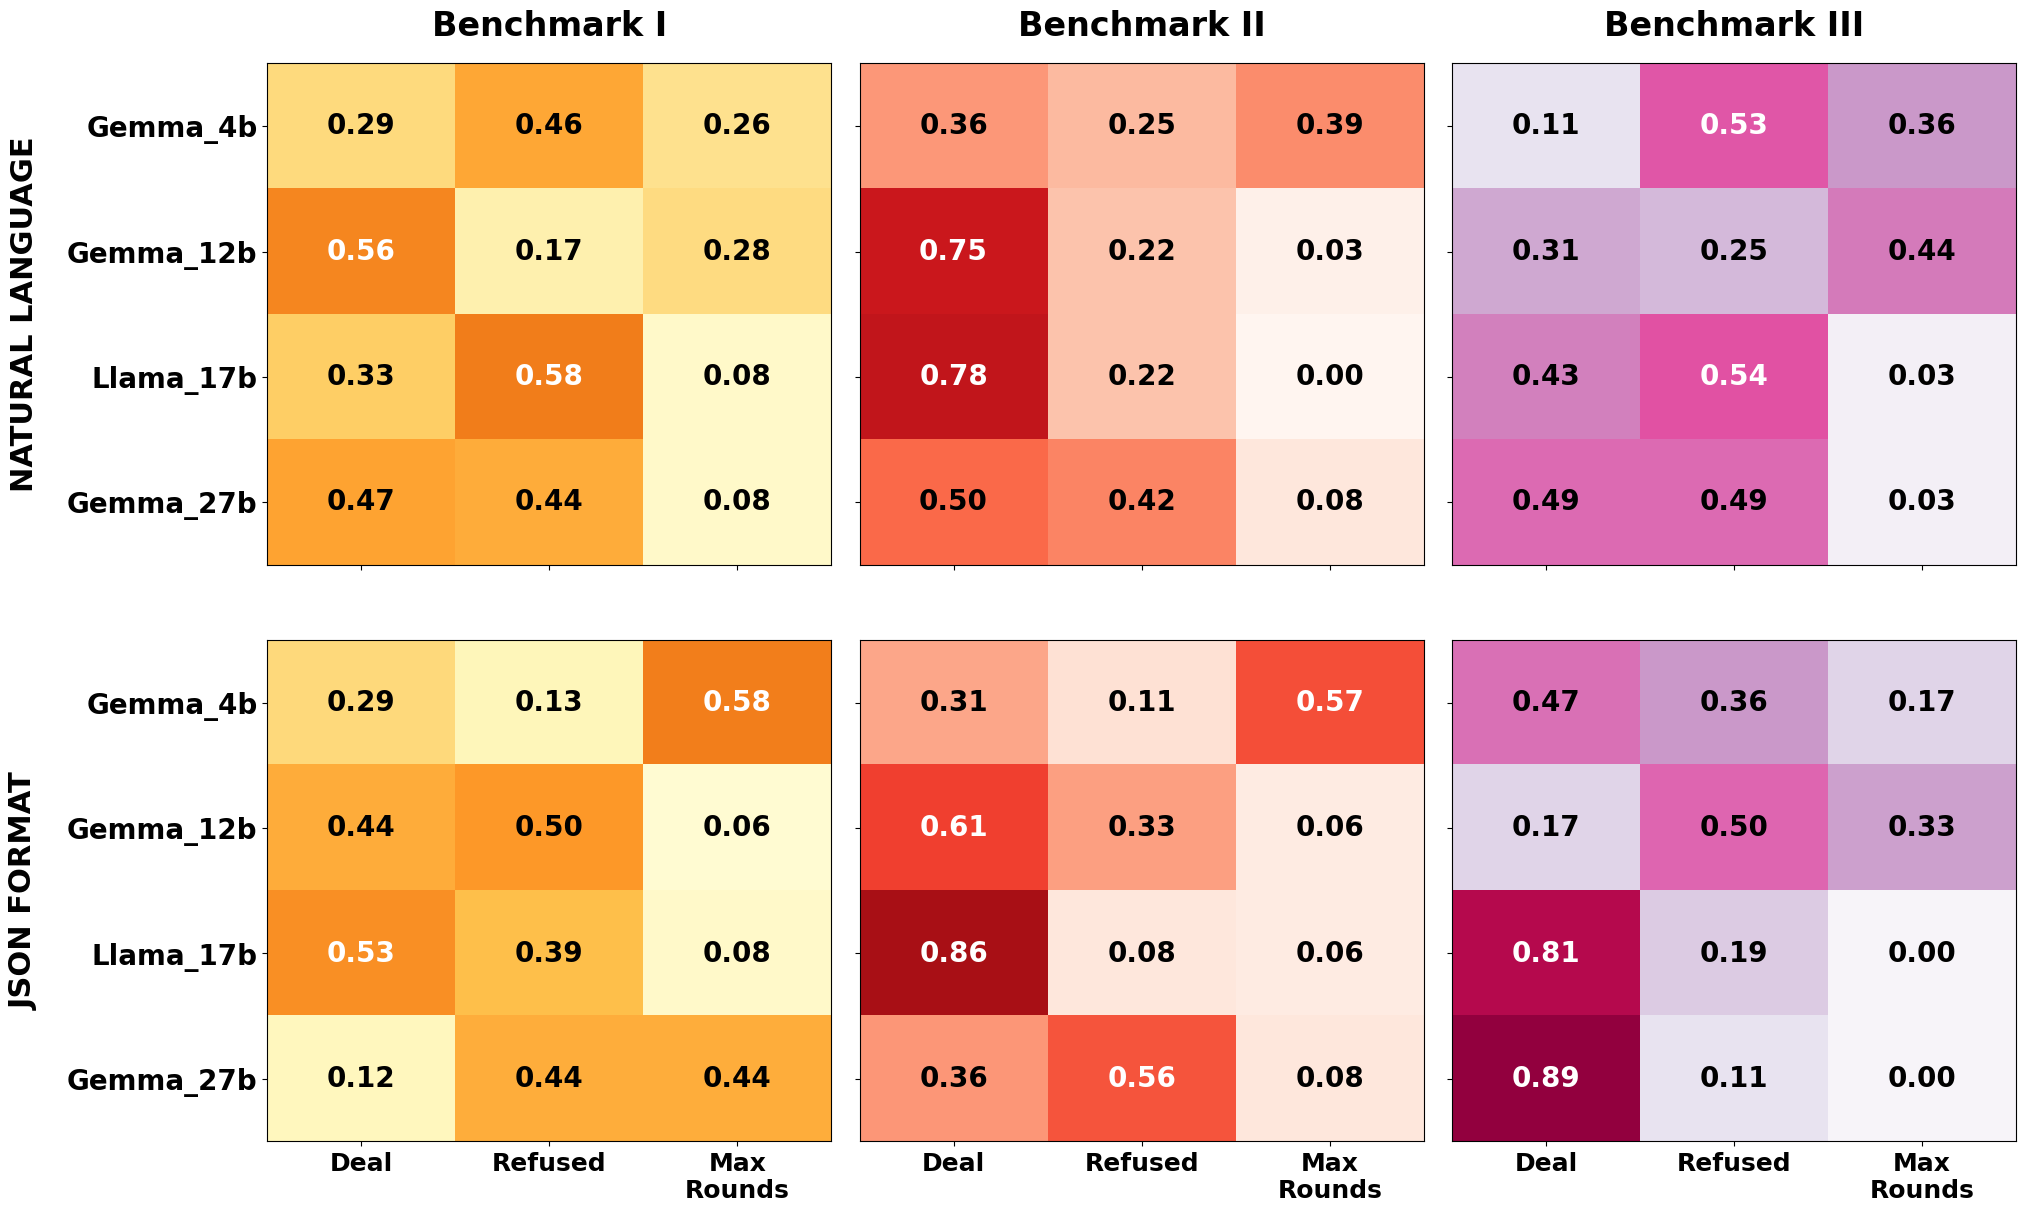

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_heatmap_comparison_grid(models):
    versions = ['I', 'II', 'III']
    categories = ['Deal', 'Refused', 'Max\nRounds']
    labels = [f"{m['name']}" for m in models]
    
    fig, axes = plt.subplots(2, 3, figsize=(22, 14), sharey=True)
    
    cmaps = {'I': 'YlOrBr', 'II': 'Reds', 'III': 'PuRd'}

    def get_normalized_data(prefix, version):
        acc = np.array([m[f'{prefix}_results_{version}']['accepted'] for m in models])
        ref = np.array([m[f'{prefix}_results_{version}']['refused'] for m in models])
        no_agr = np.array([m[f'{prefix}_results_{version}']['no_agreements'] for m in models])
        totals = acc + ref + no_agr
        totals[totals == 0] = 1 
        return np.column_stack((acc/totals, ref/totals, no_agr/totals))

    for row, prefix in enumerate(['natural', 'json']):
        for col, v in enumerate(versions):
            ax = axes[row, col]
            data = get_normalized_data(prefix, v)
            cmap = cmaps[v]
            
            im = ax.imshow(data, cmap=cmap, aspect='auto', vmin=0, vmax=1)

            for i in range(len(labels)):
                for j in range(len(categories)):
                    val = data[i, j]
                    color = "white" if val > 0.5 else "black"
                    ax.text(j, i, f"{val:.2f}", ha="center", va="center", 
                            color=color, fontweight='bold', fontsize=20)

            ax.set_xticks(np.arange(len(categories)))
            ax.set_xticklabels(categories if row == 1 else [], fontsize=18, fontweight='bold')
            
            if col == 0:
                ax.set_yticks(np.arange(len(labels)))
                ax.set_yticklabels(labels, fontsize=20, fontweight='bold')
                row_label = "NATURAL LANGUAGE" if row == 0 else "JSON FORMAT"
                ax.set_ylabel(row_label, fontsize=22, fontweight='black', labelpad=20)
            
            if row == 0:
                ax.set_title(f'Benchmark {v}', fontsize=24, fontweight='bold', pad=20)

    fig.subplots_adjust(right=0.92, hspace=0.15, wspace=0.05)

    plt.show()

plot_heatmap_comparison_grid(models)

In [69]:
def compute_style_avg_utility(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        total_concise_utility = 0
        total_discursive_utility = 0
        count_concise = 0
        count_discursive = 0
        for session in data['sessions']:
            for i in range(len(session['agents'])):
                if session['evaluation'] == {} or session['evaluation']['result'] != 'DEAL':
                    continue
                if 'discursive' in session['agents'][i]['name']:
                    if session['evaluation']['analysis'][i]['utility'] >= 0 and session['evaluation']['analysis'][i]['utility'] <= 1:
                        total_discursive_utility += session['evaluation']['analysis'][i]['utility']
                        count_discursive += 1
                elif 'concise' in session['agents'][i]['name']:
                    if session['evaluation']['analysis'][i]['utility'] >= 0 and session['evaluation']['analysis'][i]['utility'] <= 1:
                        total_concise_utility += session['evaluation']['analysis'][i]['utility']
                        count_concise += 1
        return {
            "concise_avg_utility": total_concise_utility / count_concise,
            "discursive_avg_utility": total_discursive_utility / count_discursive
        }

for model in models:
    nat_util = compute_style_avg_utility(model['path'] + naturalFile_I)
    model['natural_results_I']['avg_styles_utility'] = nat_util
    json_util = compute_style_avg_utility(model['path'] + JSONFile_I)
    model['json_results_I']['avg_styles_utility'] = json_util

print(json.dumps(models, indent=4))

[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            },
            "avg_tones_utility": {
                "neutral_avg_utility": 0.32734375685675066,
                "aggressive_avg_utility": 0.6741771368584096,
                "desperate_avg_utility": 0.8222591362126246
            },
            "avg_styles_utility": {
                "concise_avg_utility": 0.543433221124581,
                "discursive_avg_utility": 0.4700898441680567
     

In [65]:
def compute_avg_error_per_round(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        discursive_errors = 0
        concise_errors = 0
        discursive_rounds = 0
        concise_rounds = 0
        count = 0
        for session in data['sessions']:
            for message in session['history']:
                if 'discursive' in session['agents'][0]['name'] and message['role'] == 'Buyer':
                    discursive_errors += message['retry_counts']
                    discursive_rounds += 1
                elif 'concise' in session['agents'][0]['name'] and message['role'] == 'Buyer':
                    concise_errors += message['retry_counts']
                    concise_rounds += 1

        return {
            "discursive": discursive_errors / discursive_rounds if discursive_rounds > 0 else 0,
            "concise": concise_errors / concise_rounds if concise_rounds > 0 else 0
        }
    

for model in models:
    nat_errors = compute_avg_error_per_round(model['path'] + naturalFile_I)
    model['natural_results_I']['avg_errors_per_round'] = nat_errors
    json_errors = compute_avg_error_per_round(model['path'] + JSONFile_I)
    model['json_results_I']['avg_errors_per_round'] = json_errors

    nat_errors = compute_avg_error_per_round(model['path'] + naturalFile_II)
    model['natural_results_II']['avg_errors_per_round'] = nat_errors
    json_errors = compute_avg_error_per_round(model['path'] + JSONFile_II)
    model['json_results_II']['avg_errors_per_round'] = json_errors

    nat_errors = compute_avg_error_per_round(model['path'] + naturalFile_III)
    model['natural_results_III']['avg_errors_per_round'] = nat_errors
    json_errors = compute_avg_error_per_round(model['path'] + JSONFile_III)
    model['json_results_III']['avg_errors_per_round'] = json_errors
print(json.dumps(models, indent=4))

[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            },
            "avg_tones_utility": {
                "neutral_avg_utility": 0.32734375685675066,
                "aggressive_avg_utility": 0.6741771368584096,
                "desperate_avg_utility": 0.8222591362126246
            },
            "avg_styles_utility": {
                "concise_avg_utility": 0.543433221124581,
                "discursive_avg_utility": 0.4700898441680567
     

In [70]:
def compute_formatting_errors(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        concise_format_errors = 0
        discursive_format_errors = 0
        total_concise_messages = 0
        total_discursive_messages = 0
        count = 0
        for session in data['sessions']:
            for msg in session['history']:
                agent = next((a for a in session['agents'] if msg['role'].lower() in a['name']), None)
                if 'discursive' in agent['name']:
                    discursive_format_errors += msg['format_error']
                    total_discursive_messages += 1
                elif 'concise' in agent['name']:
                    concise_format_errors += msg['format_error']
                    total_concise_messages += 1
        return {
            "discursive": discursive_format_errors / total_discursive_messages if total_discursive_messages > 0 else 0,
            "concise": concise_format_errors / total_concise_messages if total_concise_messages > 0 else 0
        }
    
for model in models:
    json_formatting_errors = compute_formatting_errors(model['path'] + JSONFile_I)
    model['json_results_I']['avg_formatting_errors'] = json_formatting_errors

    json_formatting_errors = compute_formatting_errors(model['path'] + JSONFile_II)
    model['json_results_II']['avg_formatting_errors'] = json_formatting_errors

    json_formatting_errors = compute_formatting_errors(model['path'] + JSONFile_III)
    model['json_results_III']['avg_formatting_errors'] = json_formatting_errors

print(json.dumps(models, indent=4))

[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            },
            "avg_tones_utility": {
                "neutral_avg_utility": 0.32734375685675066,
                "aggressive_avg_utility": 0.6741771368584096,
                "desperate_avg_utility": 0.8222591362126246
            },
            "avg_styles_utility": {
                "concise_avg_utility": 0.543433221124581,
                "discursive_avg_utility": 0.4700898441680567
     

In [71]:

def compute_total_avg_formatting_errors(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        format_errors = 0
        count = 0
        for session in data['sessions']:
            for msg in session['history']:
                format_errors += msg['format_error']
                count += 1                
        return format_errors / count if count > 0 else 0
    
for model in models:
    json_formatting_errors = compute_total_avg_formatting_errors(model['path'] + JSONFile_I)
    model['json_results_I']['avg_formatting_errors']['total'] = json_formatting_errors

    json_formatting_errors = compute_total_avg_formatting_errors(model['path'] + JSONFile_II)
    model['json_results_II']['avg_formatting_errors']['total'] = json_formatting_errors

    json_formatting_errors = compute_total_avg_formatting_errors(model['path'] + JSONFile_III)
    model['json_results_III']['avg_formatting_errors']['total'] = json_formatting_errors

print(json.dumps(models, indent=4))

[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            },
            "avg_tones_utility": {
                "neutral_avg_utility": 0.32734375685675066,
                "aggressive_avg_utility": 0.6741771368584096,
                "desperate_avg_utility": 0.8222591362126246
            },
            "avg_styles_utility": {
                "concise_avg_utility": 0.543433221124581,
                "discursive_avg_utility": 0.4700898441680567
     

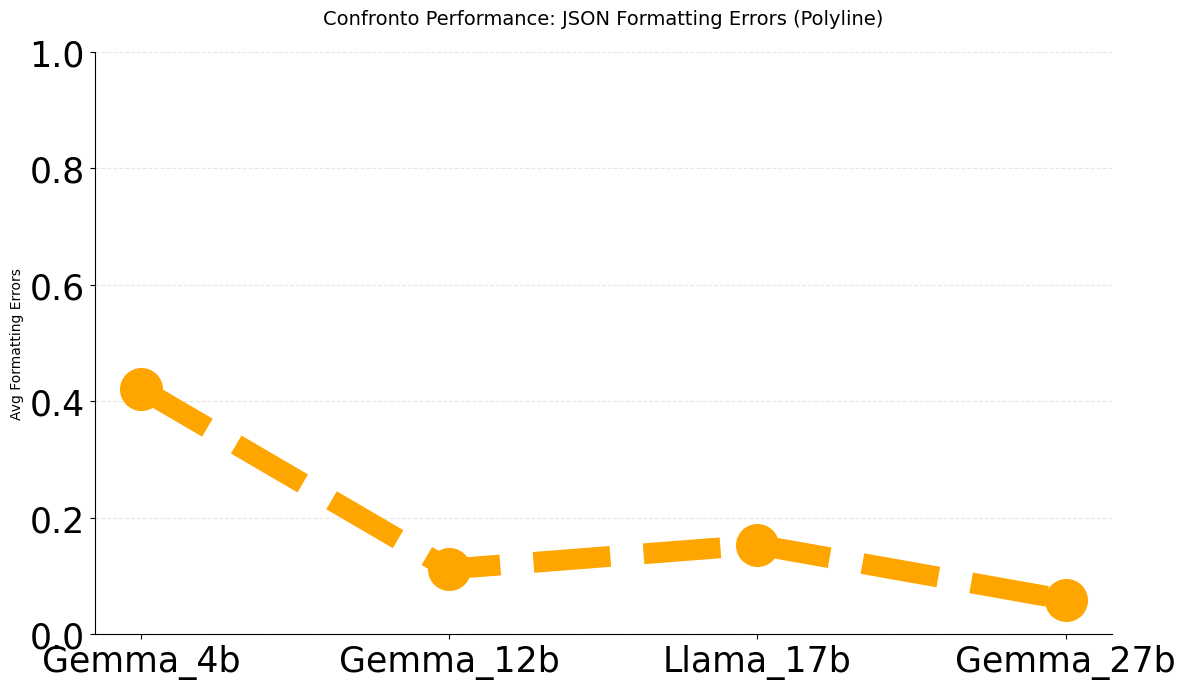

In [72]:
def plot_polyline_formattin_errors(models):
    labels = [f"{m['name']}" for m in models]
    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(12, 7))


    js_formatting_errors = np.array([m['json_results_I']['avg_formatting_errors']['total'] +
                                     m['json_results_II']['avg_formatting_errors']['total'] +
                                        m['json_results_III']['avg_formatting_errors']['total'] for m in models]) / 3

    ax.plot(x, js_formatting_errors, marker='o', linestyle='--', linewidth=15, markersize=30, label='Avg Formatting Errors (JSON)', color="#FFA500")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=25)
    ax.tick_params(axis='y', labelsize=25)
    ax.set_ylabel(f'Avg Formatting Errors')
    ax.set_title('Confronto Performance: JSON Formatting Errors (Polyline)', fontsize=14, pad=20)
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.show()
plot_polyline_formattin_errors(models)

In [52]:
def compute_avg_DI(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        total_DI = 0
        count = 0
        for session in data['sessions']:
            for message in session['history']:
                if message['role'] == 'Seller':
                    total_DI += message['DI_score'] if not math.isnan(message['DI_score']) else 0
                    count += 1
        return total_DI / count if count > 0 else 0
    
for model in models:
    nat_avg_DI = compute_avg_DI(model['path'] + naturalFile_III)
    model['natural_results_III']['avg_DI'] = nat_avg_DI
    json_avg_DI = compute_avg_DI(model['path'] + JSONFile_III)
    model['json_results_III']['avg_DI'] = json_avg_DI

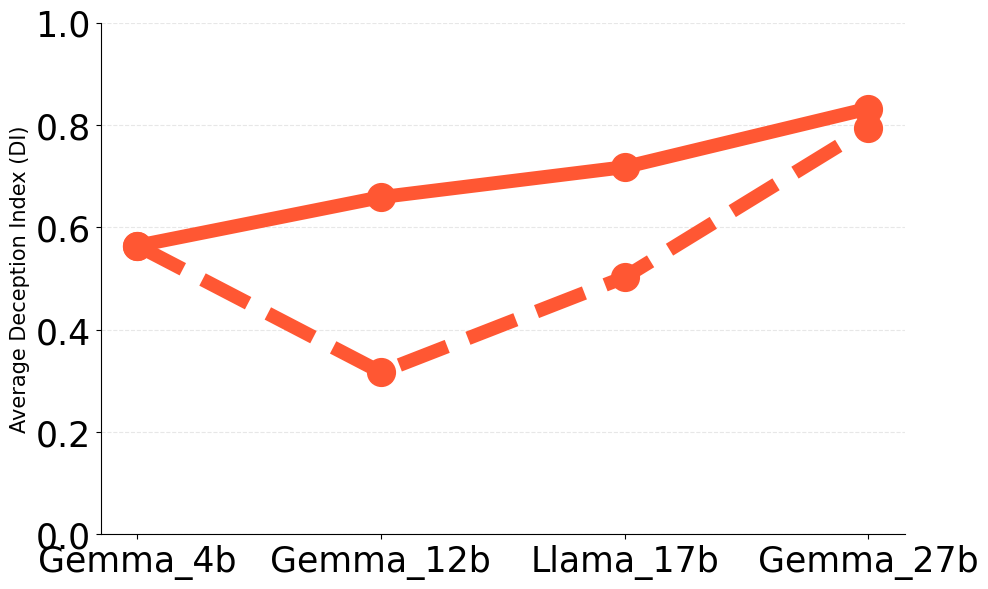

In [53]:
def plot_polyline_avg_DI(models):
    labels = [f"{m['name']}" for m in models]
    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(10, 6))

    nat_avg_DI = np.array([m['natural_results_III']['avg_DI'] for m in models])
    js_avg_DI = np.array([m['json_results_III']['avg_DI'] for m in models])

    ax.plot(x, nat_avg_DI, marker='o', markersize=20, label=f'Avg Deception Index (Natural Bench III)', color='#FF5733', linewidth=10)
    ax.plot(x, js_avg_DI, marker='o', linestyle='--', markersize=20, label=f'Avg Deception Index (JSON Bench III)', color='#FF5733', linewidth=10)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=25)
    ax.set_ylabel(f'Average Deception Index (DI)', fontsize=15)
    ax.tick_params(axis='y', labelsize=25)
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.show()

plot_polyline_avg_DI(models)

In [54]:
def compute_avg_Hallucinations(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        total_hallucinations = 0
        total_discursive_hallucinations = 0
        total_concise_hallucinations = 0
        count = 0
        count_discursive = 0
        count_concise = 0
        for session in data['sessions']:
            evaluation = session['evaluation']
            if evaluation == {}:
                continue
            for i,agent in enumerate(evaluation['analysis']):
                if 'HI' not in agent:
                    continue
                total_hallucinations += agent['HI']
                count += 1
                if 'discursive' in session['agents'][i]['name']:
                    total_discursive_hallucinations += agent['HI']
                    count_discursive += 1
                elif 'concise' in session['agents'][i]['name']:
                    total_concise_hallucinations += agent['HI']
                    count_concise += 1
                
        return {
            'total_avg_HI': total_hallucinations / count if count > 0 else 0,
            'discursive_avg_HI': total_discursive_hallucinations / count_discursive if count_discursive > 0 else 0,
            'concise_avg_HI': total_concise_hallucinations / count_concise if count_concise > 0 else 0
        }
    
for model in models:
    nat_hallucinations = compute_avg_Hallucinations(model['path'] + naturalFile_I)
    model['natural_results_I']['avg_Hallucinations'] = nat_hallucinations
    json_hallucinations = compute_avg_Hallucinations(model['path'] + JSONFile_I)
    model['json_results_I']['avg_Hallucinations'] = json_hallucinations

    nat_hallucinations = compute_avg_Hallucinations(model['path'] + naturalFile_II)
    model['natural_results_II']['avg_Hallucinations'] = nat_hallucinations
    json_hallucinations = compute_avg_Hallucinations(model['path'] + JSONFile_II)
    model['json_results_II']['avg_Hallucinations'] = json_hallucinations

    nat_hallucinations = compute_avg_Hallucinations(model['path'] + naturalFile_III)
    model['natural_results_III']['avg_Hallucinations'] = nat_hallucinations
    json_hallucinations = compute_avg_Hallucinations(model['path'] + JSONFile_III)
    model['json_results_III']['avg_Hallucinations'] = json_hallucinations

print(json.dumps(models, indent=4))

[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            },
            "avg_tones_utility": {
                "neutral_avg_utility": 0.32734375685675066,
                "aggressive_avg_utility": 0.6741771368584096,
                "desperate_avg_utility": 0.8222591362126246
            },
            "avg_styles_utility": {
                "concise_avg_utility": 0.543433221124581,
                "discursive_avg_utility": 0.4700898441680567
     

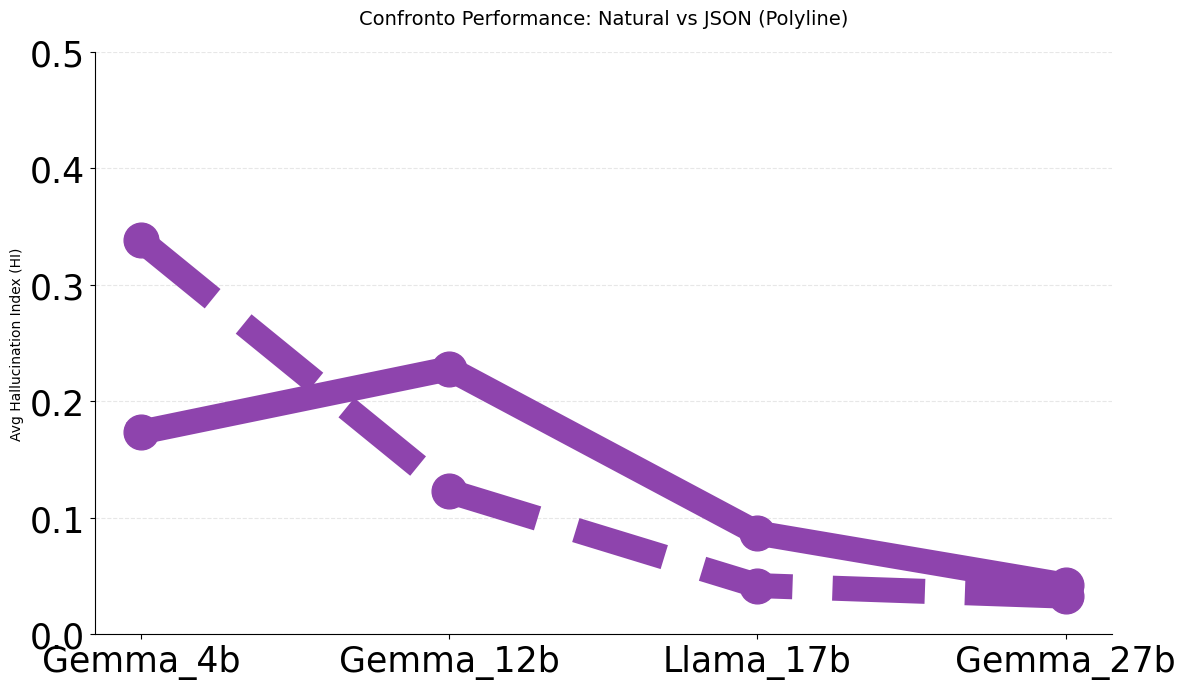

In [61]:
def plot_polyline_avg_HI(models):
    labels = [f"{m['name']}" for m in models]
    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(12, 7))

    nat_total_HI = np.array([
        (m['natural_results_I']['avg_Hallucinations']['total_avg_HI'] +
         m['natural_results_II']['avg_Hallucinations']['total_avg_HI'] +
         m['natural_results_III']['avg_Hallucinations']['total_avg_HI']) / 3
        for m in models
    ])
    js_total_HI = np.array([
        (m['json_results_I']['avg_Hallucinations']['total_avg_HI'] +
         m['json_results_II']['avg_Hallucinations']['total_avg_HI'] +
         m['json_results_III']['avg_Hallucinations']['total_avg_HI']) / 3
        for m in models
    ])

    ax.plot(x, nat_total_HI, marker='o', linewidth=18, markersize=25, label='Avg Hallucination Index (Total Natural)', color='#8E44AD')
    ax.plot(x, js_total_HI, marker='o', linestyle='--', linewidth=18, markersize=25, label='Avg Hallucination Index (Total JSON)', color='#8E44AD')

    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=25)
    ax.tick_params(axis='y', labelsize=25)
    ax.set_ylabel(f'Avg Hallucination Index (HI)')
    ax.set_title('Confronto Performance: Natural vs JSON (Polyline)', fontsize=14, pad=20)
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0, 0.5)
    plt.tight_layout()
    plt.show()

plot_polyline_avg_HI(models)

In [57]:
from collections import Counter


def compute_natural_avg_MR(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        total_MDI = 0
        
        for session in data['sessions']:
            count = 0
            message_repeated = 0
            messages = [msg['text'] for msg in session['history']]
            for i in range(0, len(messages)):
                messages[i] = messages[i].lower().replace("\n", "").replace(" ", "")
            
            counts = Counter(messages)
            for msg, cnt in counts.items():
                message_repeated += cnt - 1
                count += 1

            total_MDI += message_repeated / count if count > 0 else 0  
                
        return total_MDI / len(data['sessions']) if len(data['sessions']) > 0 else 0
    
for model in models:
    nat_avg_MR = compute_natural_avg_MR(model['path'] + naturalFile_I)
    model['natural_results_I']['avg_MR'] = nat_avg_MR
    json_avg_MR = compute_natural_avg_MR(model['path'] + JSONFile_I)
    model['json_results_I']['avg_MR'] = json_avg_MR
    nat_avg_MR = compute_natural_avg_MR(model['path'] + naturalFile_II)
    model['natural_results_II']['avg_MR'] = nat_avg_MR
    json_avg_MR = compute_natural_avg_MR(model['path'] + JSONFile_II)
    model['json_results_II']['avg_MR'] = json_avg_MR
    nat_avg_MR = compute_natural_avg_MR(model['path'] + naturalFile_III)
    model['natural_results_III']['avg_MR'] = nat_avg_MR
    json_avg_MR = compute_natural_avg_MR(model['path'] + JSONFile_III)
    model['json_results_III']['avg_MR'] = json_avg_MR

print(json.dumps(models, indent=4))

[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            },
            "avg_tones_utility": {
                "neutral_avg_utility": 0.32734375685675066,
                "aggressive_avg_utility": 0.6741771368584096,
                "desperate_avg_utility": 0.8222591362126246
            },
            "avg_styles_utility": {
                "concise_avg_utility": 0.543433221124581,
                "discursive_avg_utility": 0.4700898441680567
     

In [60]:
from Utilities import Utilities 
def compute_numbers_of_messages_hallucination(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        number_of_tokens = []
        hallucination_indexes = []
        for session in data['sessions']:
            avg_HI = (session['evaluation']['analysis'][0]['HI'] + session['evaluation']['analysis'][1]['HI']) / 2
            number_of_tokens.append(Utilities.total_number_of_tokens([msg['text'] for msg in session['history']]))
            hallucination_indexes.append(avg_HI)

        return {
            'number_of_tokens': number_of_tokens,
            'hallucination_indexes': hallucination_indexes
        }
    
model = models[0]
model['natural_results_I']['hallucination_for_tokens'] = compute_numbers_of_messages_hallucination(model['path'] + naturalFile_I)
model['json_results_I']['hallucination_for_tokens'] = compute_numbers_of_messages_hallucination(model['path'] + JSONFile_I)
model['natural_results_II']['hallucination_for_tokens'] = compute_numbers_of_messages_hallucination(model['path'] + naturalFile_II)
model['json_results_II']['hallucination_for_tokens'] = compute_numbers_of_messages_hallucination(model['path'] + JSONFile_II)
model['natural_results_III']['hallucination_for_tokens'] = compute_numbers_of_messages_hallucination(model['path'] + naturalFile_III)
model['json_results_III']['hallucination_for_tokens'] = compute_numbers_of_messages_hallucination(model['path'] + JSONFile_III)


print(json.dumps(models, indent=4))


[
    {
        "name": "Gemma_4b",
        "n_param": 4,
        "path": "DealingProblem/Sessions_Gemma_4b",
        "natural_results_I": {
            "accepted": 10,
            "refused": 16,
            "no_agreements": 9,
            "avg_rounds": {
                "avg_rounds_accepted": 62.0,
                "avg_rounds_refused": 39.0,
                "avg_rounds_no_agreements": 19.0
            },
            "avg_rounds_overall": 3.43,
            "avg_utility": {
                "buyer_avg_utility": 0.7508997960592804,
                "seller_avg_utility": 0.24428742499422626
            },
            "avg_tones_utility": {
                "neutral_avg_utility": 0.32734375685675066,
                "aggressive_avg_utility": 0.6741771368584096,
                "desperate_avg_utility": 0.8222591362126246
            },
            "avg_styles_utility": {
                "concise_avg_utility": 0.543433221124581,
                "discursive_avg_utility": 0.4700898441680567
     

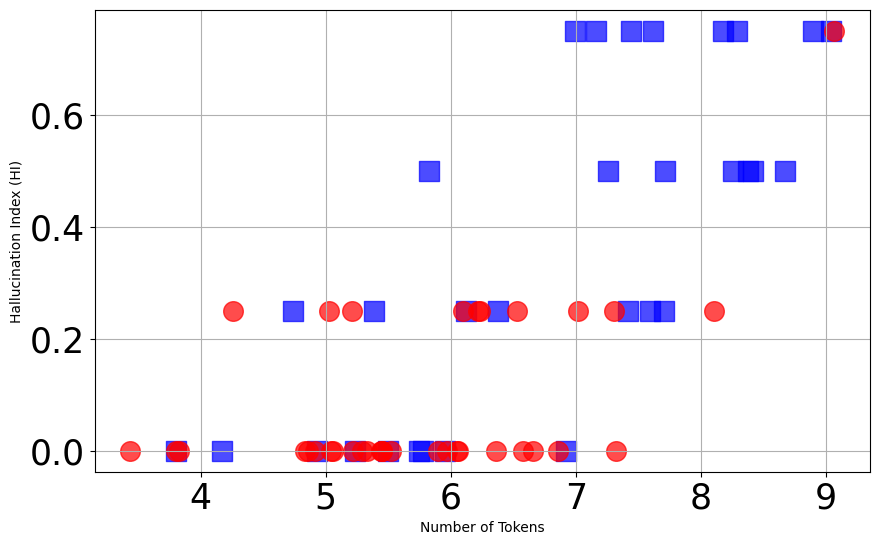

In [ ]:
from math import log


def scatter_hallucination_vs_tokens(models):
    plt.figure(figsize=(10, 6))
    
    model = models[0]
    
    n_tokens = [log(result) for result in model['json_results_I']['hallucination_for_tokens']['number_of_tokens']]
    indexes = model['json_results_I']['hallucination_for_tokens']['hallucination_indexes']
    plt.scatter(n_tokens, indexes, 
            label=model['name'], 
            marker='s', 
            s=200,          
            c='blue',       
            linewidths=1,   
            alpha=0.7)
    
    n_tokens = [log(result) for result in model['natural_results_I']['hallucination_for_tokens']['number_of_tokens']]
    indexes = model['natural_results_I']['hallucination_for_tokens']['hallucination_indexes']
    plt.scatter(n_tokens, indexes, 
            label=model['name'], 
            marker='o', 
            s=200,          
            c='red',        
            linewidths=1,   
            alpha=0.7)


    plt.title(f'Hallucination Index vs Number of Tokens')
    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.xlabel('Number of Tokens')
    plt.ylabel('Hallucination Index (HI)')
    plt.grid(True)
    plt.show()
scatter_hallucination_vs_tokens(models)
